In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
pca_scale = pca.fit_transform(df)

In [8]:
pca_scale

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

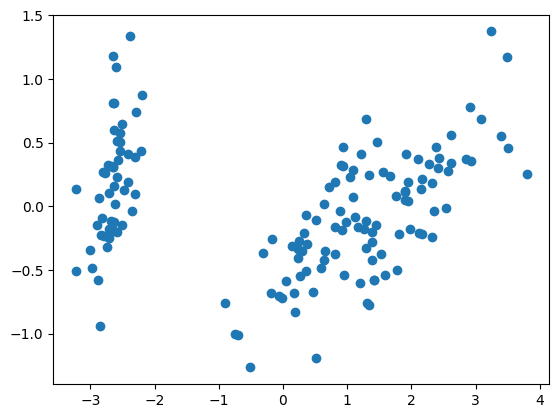

In [9]:
plt.scatter(pca_scale[:,0],pca_scale[:,1])

In [32]:
wcss = []
for k in range(2,20):
    Kmeans = KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(pca_scale)
    wcss.append(Kmeans.inertia_)

In [33]:
wcss

[137.1553011281841,
 63.81994202200126,
 42.26643460946296,
 33.48023506321648,
 26.16147972487101,
 22.03295089939222,
 18.017427874917452,
 15.791890789930637,
 13.967463989765312,
 12.638787857927449,
 11.318687254885443,
 10.467008539227374,
 9.89364229389174,
 9.128488662995071,
 8.420852656410919,
 7.876387634975602,
 7.108810827725858,
 6.814759414360222]

ValueError: x and y must have same first dimension, but have shapes (19,) and (18,)

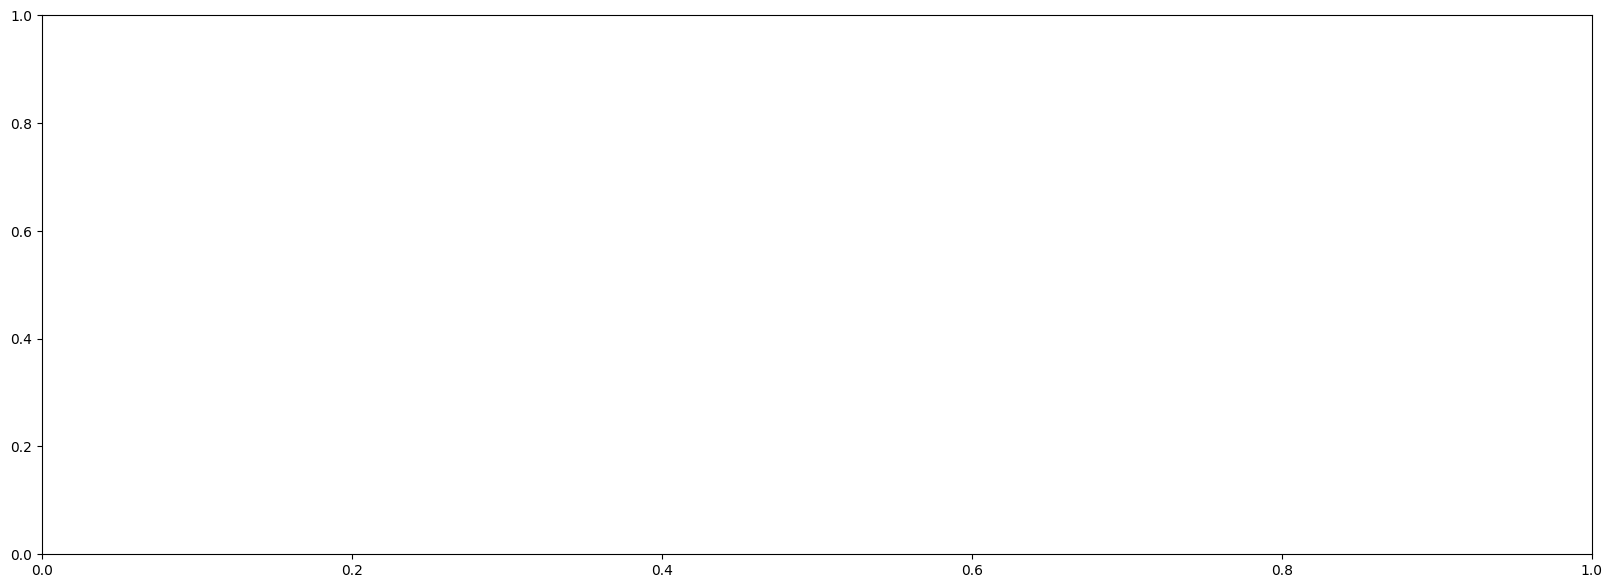

In [34]:
plt.figure(figsize=(20,7))
plt.plot(range(1,20),wcss)
plt.show()

In [ ]:
from kneed import KneeLocator

In [35]:
k = KneeLocator(range(2,20),wcss,direction='decreasing',curve='convex')

In [36]:
k.elbow

5

In [37]:
Kmeans = KMeans(n_clusters=3,init='k-means++')

In [38]:
pre = Kmeans.fit_predict(pca_scale)

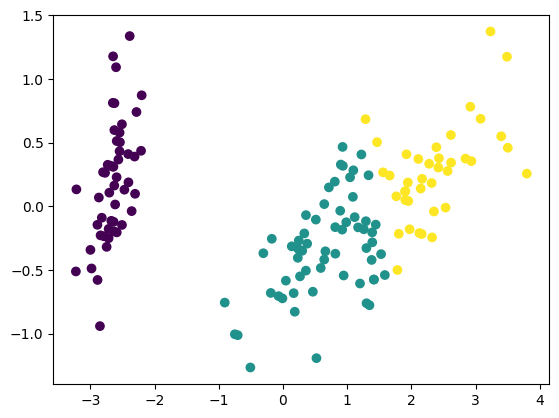

In [39]:
plt.scatter(pca_scale[:,0],pca_scale[:,1],c=pre)

In [40]:
from sklearn.metrics import silhouette_score
error = []

for k in range(2,20):
    Kmeans = KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(pca_scale)
    score = silhouette_score(pca_scale,Kmeans.labels_)
    error.append(score)

In [41]:
error

[0.7056703225102109,
 0.5976764219547991,
 0.5591106064519759,
 0.5535698812209563,
 0.445945182029375,
 0.43688068010011816,
 0.4539406629551644,
 0.4424821265896889,
 0.4074429408734003,
 0.41029344529634804,
 0.400259855400169,
 0.38695382392641825,
 0.39632195480402344,
 0.37986084115383334,
 0.39344475340612445,
 0.3940828688222681,
 0.3741885531427755,
 0.36485162785334035]

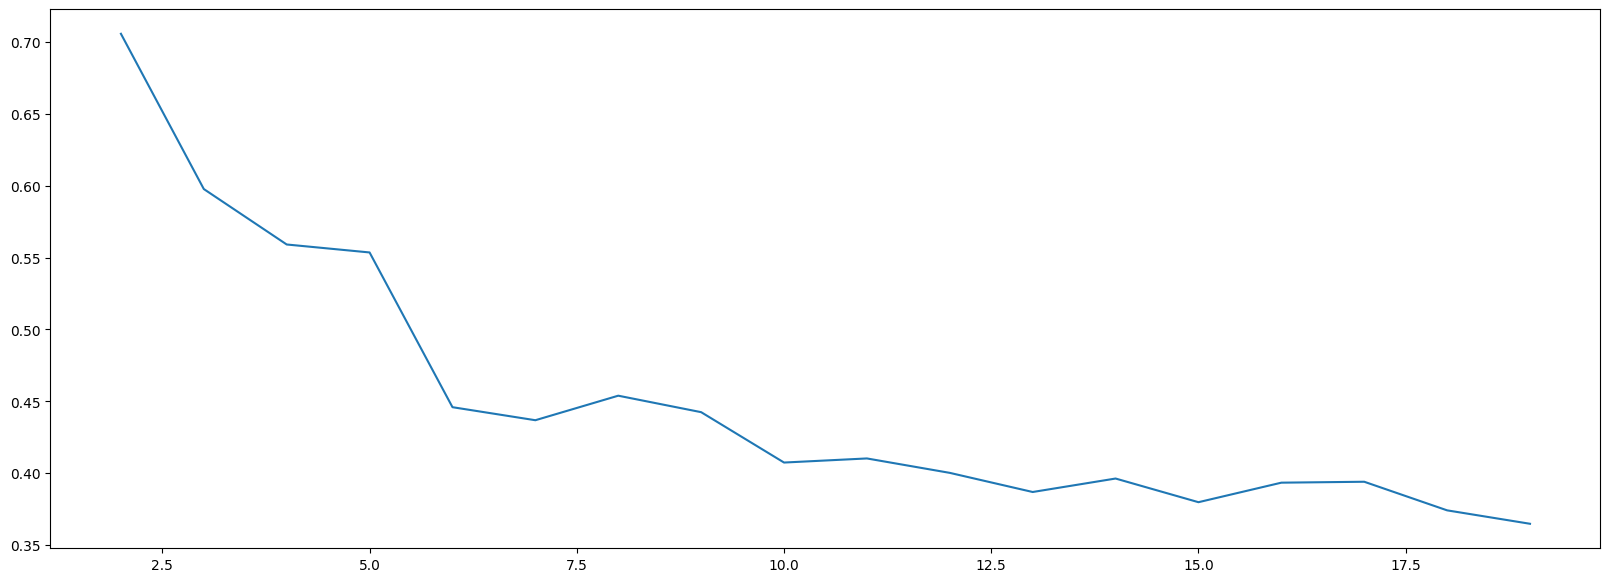

In [42]:
plt.figure(figsize=(20,7))
plt.plot(range(2,20),error)
plt.show()